In [22]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [23]:
df=pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)

In [24]:
df.isnull().sum() # vedo null

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

## x noia volevo vedere quante canzoni ci sono per artista

In [25]:
df[['name','artists']].describe()

,name,artists
count,15000,15000
unique,15000,6257
top,Long Road,Vybz Kartel
freq,1,80


In [26]:
df["artists"].value_counts()


Vybz Kartel                     80
Germaine Franco                 75
Scooter                         74
Sarah, the Illstrumentalist     69
Jay Chou                        67
                                ..
Fabio Brazza;Péricles            1
Calyx & TeeBee;Calyx;Teebee      1
Stefflon Don                     1
Vybz Kartel;Sheba                1
Cosmic Gate;Nathan Nicholson     1
Name: artists, Length: 6257, dtype: int64

In [27]:
df[df['artists'] == 'Vybz Kartel'] # mettere una condizione su un attributo

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
12,Beautiful Girl,218329,False,22,Vybz Kartel,Kingston Story (Deluxe Edition),0.792,0.854,7,-6.170,...,0.1080,0.829,110.010,218329,4.0,400.0,98.0,NaN,4.067086,j-dance
73,Tell Me If Yuh Like It,186666,True,22,Vybz Kartel,Tell Me If Yuh Like It,0.650,0.739,4,-4.554,...,0.0750,0.331,114.966,186667,5.0,354.0,87.0,0.972,0.916010,j-dance
665,Secret,221596,False,21,Vybz Kartel,Secret,0.777,0.930,8,-5.250,...,0.1180,0.867,104.023,221597,4.0,374.0,92.0,0.313,2.725904,j-dance
694,Nice Suh,161632,False,0,Vybz Kartel,Nice Suh,0.626,0.676,9,-7.241,...,0.1280,0.373,195.932,161633,4.0,509.0,128.0,NaN,1.343558,j-dance
720,Black Woman,173871,False,20,Vybz Kartel,Black Woman,0.505,0.620,2,-8.328,...,0.0734,0.547,130.637,173871,5.0,372.0,92.0,0.042,3.700483,j-dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13510,Life Me Say,132000,True,22,Vybz Kartel,Reggae Love Songs Deluxe Edition,0.619,0.499,2,-8.730,...,0.2080,0.278,159.906,132000,4.0,295.0,73.0,NaN,3.700483,j-dance
14327,How Mi Grow,144000,False,0,Vybz Kartel,Farr Out,0.605,0.798,1,-4.436,...,0.0612,0.942,94.190,144000,4.0,224.0,56.0,0.657,2.367412,j-dance
14906,Tip,189333,True,22,Vybz Kartel,Dancehall Posse Riddim,0.690,0.729,9,-4.980,...,0.0740,0.713,119.409,189333,5.0,370.0,92.0,NaN,1.343558,j-dance
14910,Yea Through I Walk,212813,False,20,Vybz Kartel,Pon Di Gaza 2.0,0.510,0.838,8,-6.631,...,0.1200,0.541,165.706,212813,4.0,582.0,146.0,NaN,2.725904,j-dance


## controllo la popolarità per genere 

In [28]:
df["genre"].value_counts() #conto quanti sono x genere 


j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64

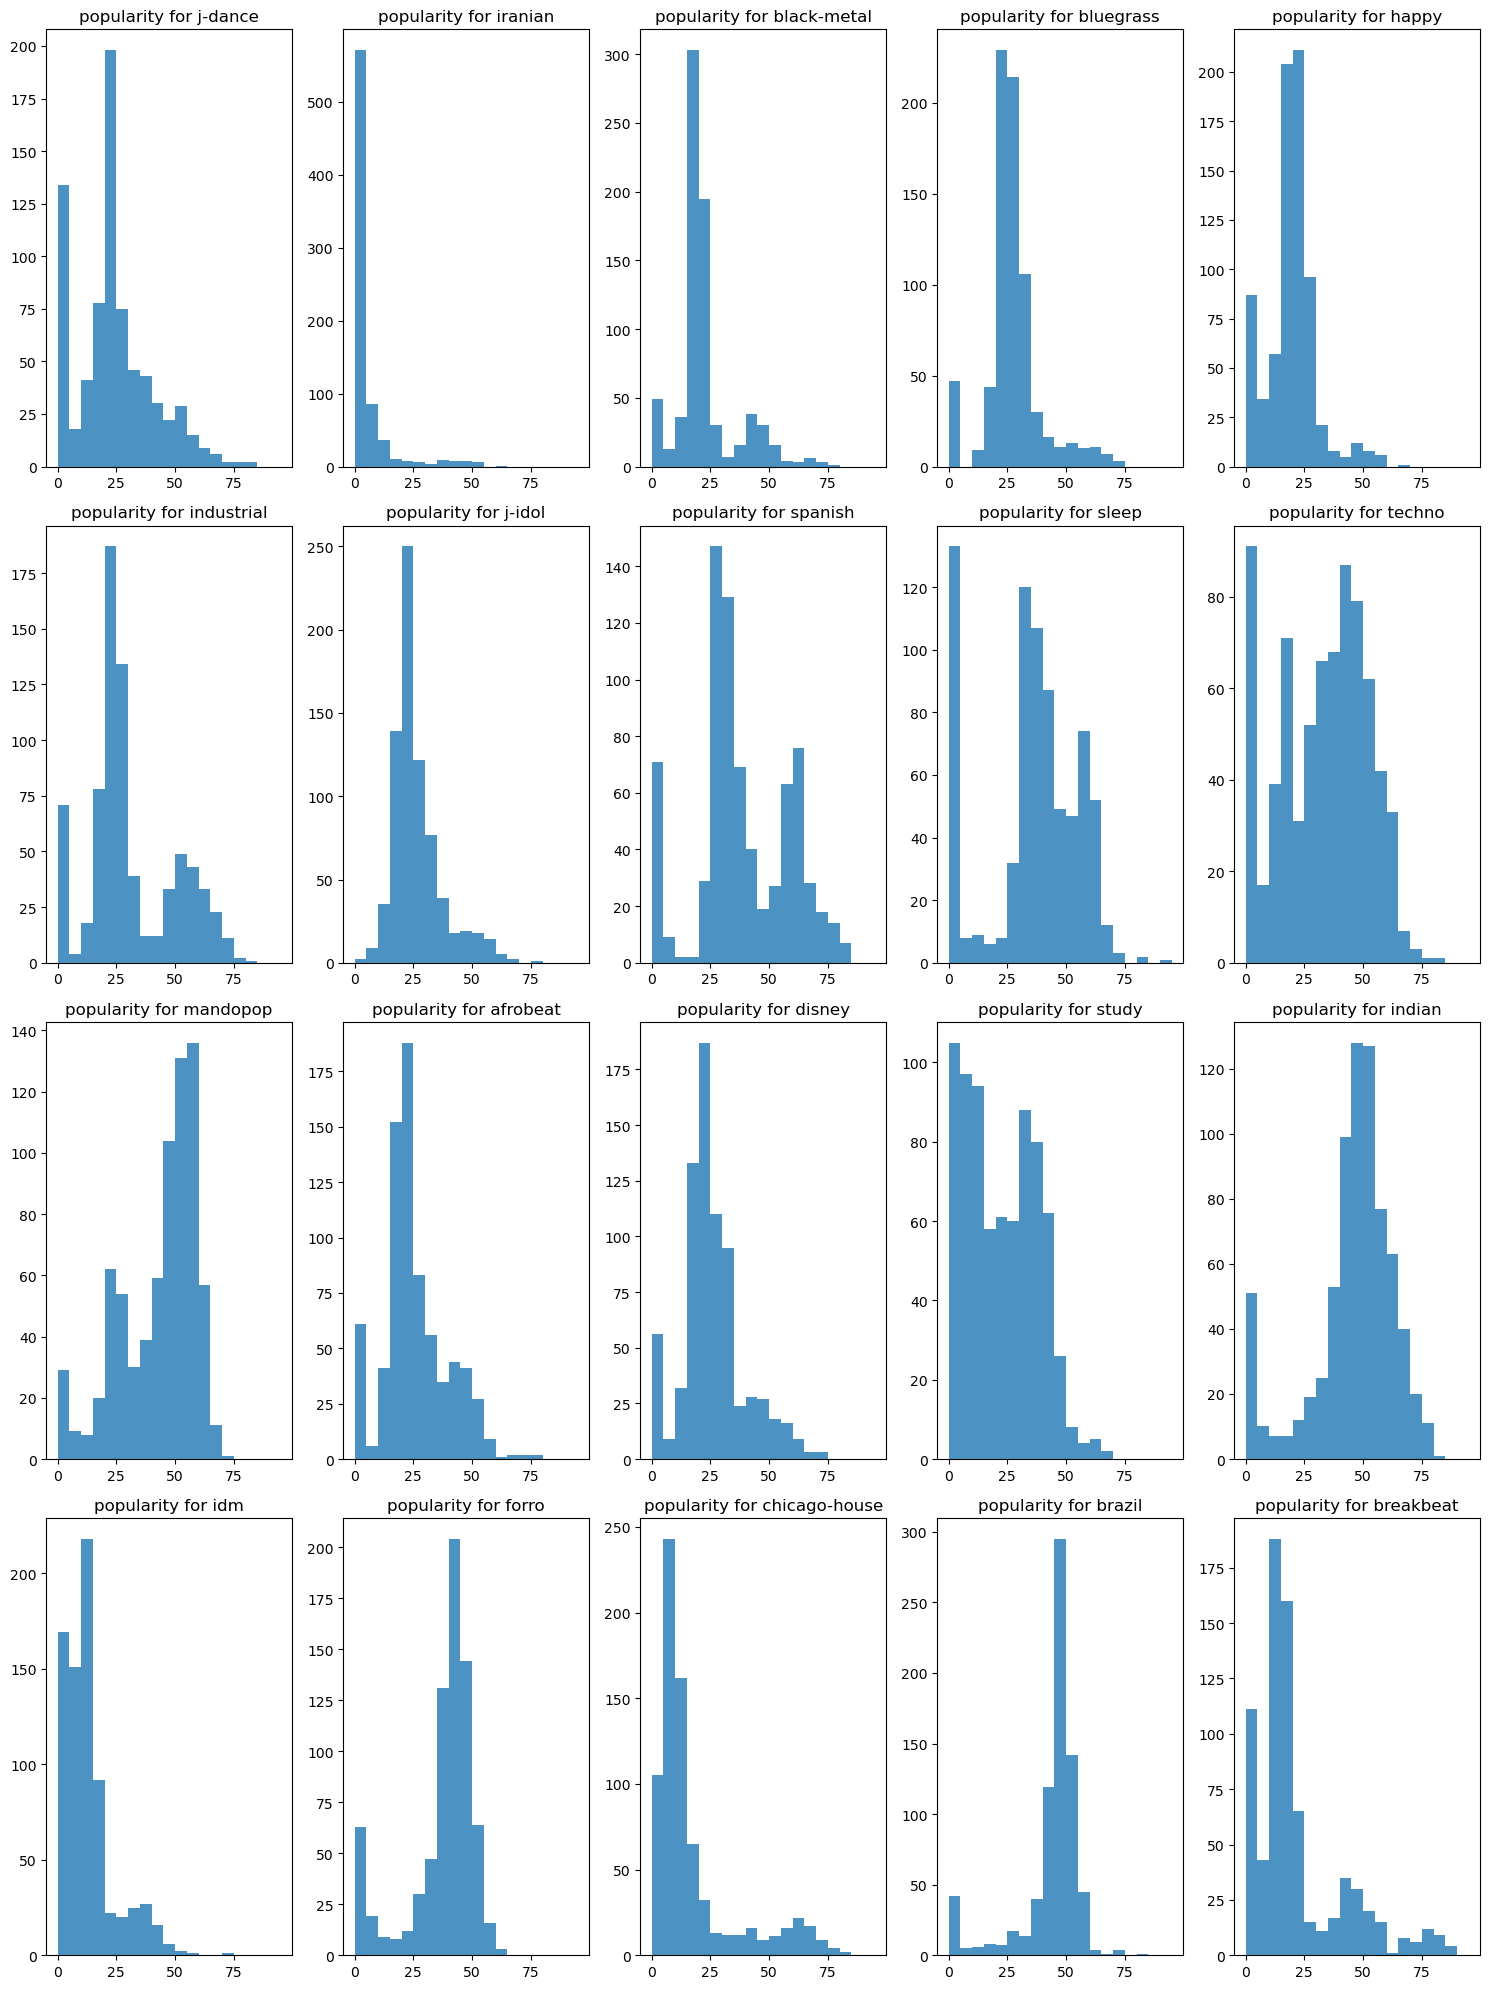

In [29]:
# uso un ciclo x fare un istogramma x la popularity di ogni genre
num_categories = len(df['genre'].unique())  #Calcola il numero di categorie uniche
num_cols = 5  #numero di colonne per la griglia
num_rows = (num_categories + num_cols - 1) // num_cols # Calcola il numero di righe  in base alle colonne
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows)) # Imposta le dimensioni della figura in base al numero di colonne

# Ciclo per ogni categoria unica in 'genre' e disegna l'istogramma su un subplot
for i, v in enumerate(df['genre'].unique()):
    row = i // num_cols
    col = i % num_cols
    plt.sca(axs[row, col])  # Imposta l'asse corrente
    plt.hist(df[df['genre'] == v]['popularity'], bins=np.arange(0,100,5), alpha=0.8, label=v)
    plt.title('popularity for ' + v)


plt.tight_layout()  #migliore visualizzazione
plt.show()


In [30]:
df.groupby(['genre']).mean() # vedo raggruppato x genere le varie mean

C:\Users\lollo\AppData\Local\Temp\ipykernel_14052\3208279470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['genre']).mean() # vedo raggruppato x genere le varie mean


,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
genre,,,,,,,,,,,,,,,,,,,,
afrobeat,255761.637333,0.018667,25.104000,0.631279,0.675015,5.372000,-8.225705,0.559322,0.079777,0.274824,0.256546,0.196136,0.632641,119.044092,255556.750667,3.911628,501.882667,128.588000,0.477034,2.218117
black-metal,312680.757333,0.141333,22.160000,0.298734,0.875368,5.504000,-6.508709,0.571977,0.087969,0.027036,0.438376,0.243304,0.194478,128.388135,312676.744000,3.818605,656.552000,171.869333,0.479532,2.167187
bluegrass,224340.145333,0.004000,26.738667,0.538100,0.537173,5.438667,-9.783220,0.833962,0.041848,0.539167,0.132831,0.222549,0.632191,125.319551,224340.520000,3.897991,457.505333,117.208000,0.511243,2.395470
brazil,272329.881333,0.080000,43.029333,0.554036,0.618380,5.357333,-7.759363,0.672381,0.094596,0.334509,0.022967,0.298859,0.466042,121.317551,272320.156000,3.955247,544.018667,137.853333,0.512413,2.191591
breakbeat,297002.881333,0.058667,21.272000,0.655724,0.835011,5.410667,-6.025184,0.587477,0.085956,0.040624,0.363216,0.210023,0.485040,131.591501,297003.284000,3.993846,647.614667,162.260000,0.486670,2.203220
chicago-house,327283.858667,0.024000,17.185333,0.753515,0.736044,5.736000,-8.546865,0.514440,0.072934,0.047374,0.421360,0.147124,0.563743,123.802607,327302.682667,3.982839,671.200000,168.578667,0.485371,2.015716
disney,151753.028000,0.000000,25.397333,0.518562,0.348533,4.386667,-13.748233,0.752363,0.084048,0.690654,0.312890,0.168950,0.441329,115.194593,151753.400000,3.800000,280.060000,73.281333,0.465467,2.486199
forro,202532.865333,0.018667,36.796000,0.632316,0.771311,5.168000,-5.505208,0.658349,0.055037,0.397581,0.013158,0.294420,0.726285,137.302480,202533.365333,3.966049,442.805333,111.184000,0.539073,2.185201
happy,238628.281333,0.117333,19.032000,0.574681,0.907287,5.769333,-5.203780,0.631179,0.112075,0.061112,0.217085,0.281472,0.399956,149.550319,238631.509333,3.962963,591.506667,148.524000,0.545302,2.185718


# What I want study
 
----------------------------------------------------------------------------------------------------------------------------------------------- 
------------------------------------------------------------------------------------------------------------------------------------------------
### song with or not words
- n_bars:			The total number of time intervals of the bars throughout the track. 
- speechiness: 			Speechiness detects the presence of spoken words in a track. 
- acousticness:			A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness:		Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0	
- explicit: 			Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
------------------------------------------------------------------------------------------------------------------------------------------------	


###  - connection between these (beacause are all connected with movement)
- danceability: 		Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable    
- energy: 			Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
- loudness: 			The overall loudness of a track in decibels (dB)
n_beats
------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
df[['danceability','energy','loudness','n_beats']].describe()

,danceability,energy,loudness,n_beats
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.551063,0.656231,-8.894999,501.862333
std,0.194239,0.264371,6.005799,280.689804
min,0.000000,0.000000,-49.531000,0.000000
25%,0.441000,0.480000,-10.636250,327.000000
50%,0.580000,0.709000,-7.303000,461.000000
75%,0.695000,0.884000,-5.101000,625.000000
max,0.980000,1.000000,3.156000,7348.000000


In [32]:
df[['danceability','energy','loudness','n_beats']].corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,danceability,energy,loudness,n_beats
danceability,1.000000,0.193940,0.385244,-0.033604
energy,0.193940,1.000000,0.720907,0.243586
loudness,0.385244,0.720907,1.000000,0.165565
n_beats,-0.033604,0.243586,0.165565,1.000000


 ### non mi sembra di vedere nulla di che qui... FORSE LOUDNESS E ENERGY

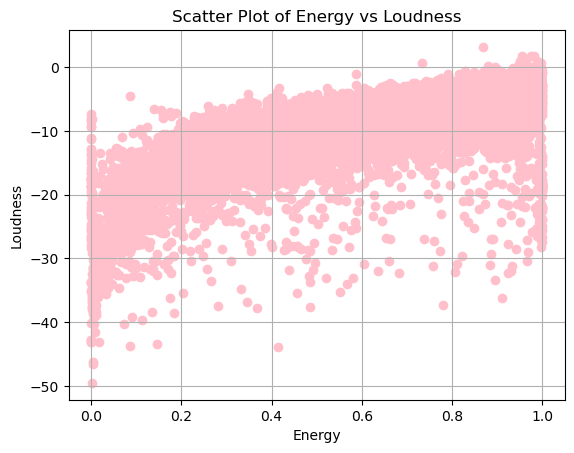

In [33]:

plt.scatter(df['energy'], df['loudness'], color='pink', marker='o')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Scatter Plot of Energy vs Loudness')
plt.grid(True)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------
#  connection with the melody of music
- key:				The key the track is in. Integers map to pitches using standard Pitch Class notation. 
- mode:				Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0
- valence:			A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 


In [34]:
df[['key','mode','valence']].corr() # nessuna cazzo di corr diocane

,key,mode,valence
key,1.000000,-0.157515,0.028221
mode,-0.157515,1.000000,-0.006907
valence,0.028221,-0.006907,1.000000


In [35]:
df[['key','mode','valence']].isnull().sum() 

key           0
mode       4450
valence       0
dtype: int64

In [36]:
 df.groupby(df['genre'])['mode','key','valence'].mean()


C:\Users\lollo\AppData\Local\Temp\ipykernel_14052\959586104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(df['genre'])['mode','key','valence'].mean()


,mode,key,valence
genre,,,
afrobeat,0.559322,5.372000,0.632641
black-metal,0.571977,5.504000,0.194478
bluegrass,0.833962,5.438667,0.632191
brazil,0.672381,5.357333,0.466042
breakbeat,0.587477,5.410667,0.485040
chicago-house,0.514440,5.736000,0.563743
disney,0.752363,4.386667,0.441329
forro,0.658349,5.168000,0.726285
happy,0.631179,5.769333,0.399956


 ### NON SO QUANTO POSSA ESSERE GIUSTO : se si intende la mean come ci sono piu 0 o più 1  ALLORA i null di mode si possono prendere dalla KEY o dalla GENRE (Il pitch e la modalità sono due  fattori che possono contribuire a definire il mood complessivo di una composizione musicale.)

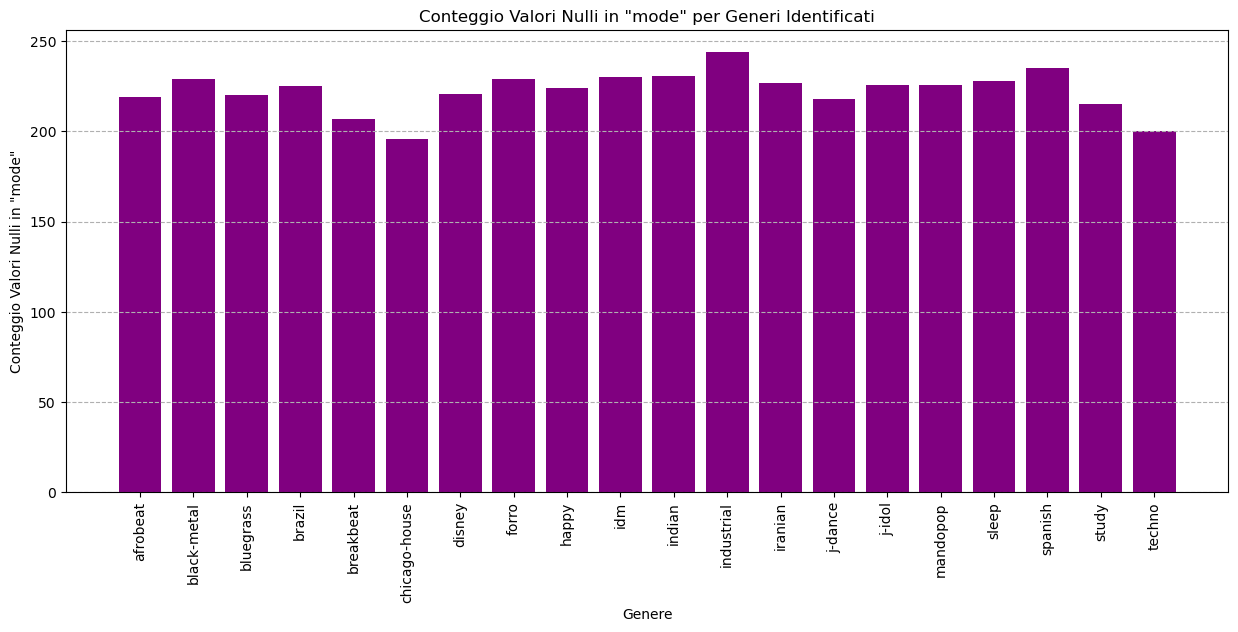

In [37]:
# Estrai i generi identificati in precedenza
generi_con_valori_nulli = df[df['mode'].isnull()]['genre'].unique()

# Filtra il DataFrame originale per questi generi
df_filtrato = df[df['genre'].isin(generi_con_valori_nulli)]

# Calcola il conteggio dei valori nulli in "mode" per ciascun genere
conteggio_valori_nulli = df_filtrato.groupby('genre')['mode'].apply(lambda x: x.isnull().sum())

# Crea un grafico a barre per visualizzare il conteggio dei valori nulli
plt.figure(figsize=(15, 6))
plt.bar(conteggio_valori_nulli.index, conteggio_valori_nulli.values, color='purple')
plt.xlabel('Genere')
plt.ylabel('Conteggio Valori Nulli in "mode"')
plt.title('Conteggio Valori Nulli in "mode" per Generi Identificati')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()

#### x ogni genere ci sono poco piu di 200 null , ora non so se questa cosa sia un bene o un male  ..... NON VEDO NULLA CHE AIUTI QUESTA ANALISI O CHE DIMOSTRI QUALCOSA DI UTILE
--------------------------------------------------------------------------------------------

# studio que e vedo se ci sono correlazioni
- duration_ms: 			The track length in milliseconds
- tempo:			The overall estimated tempo of a track in beats per minute (BPM).  
- :The duration of the track in milliseconds
- time_signature:	An estimated time signature. 

In [38]:
df[["duration_ms","tempo","features_duration_ms","time_signature"]].corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,duration_ms,tempo,features_duration_ms,time_signature
duration_ms,1.000000,0.048765,0.999918,0.009033
tempo,0.048765,1.000000,0.048738,0.215747
features_duration_ms,0.999918,0.048738,1.000000,0.008997
time_signature,0.009033,0.215747,0.008997,1.000000


#### si nota che duration e features duration sono praticamente la stessa cosa , pesno allora che possa essere tolto dal df ...
 -----------------------------------------------------------------------------------------------------------------------------------

# structural division of music
- n_beats:			The total number of time intervals of beats throughout the track. 
- n_bars:			The total number of time intervals of the bars throughout the track. 
- x sfizio ho visto anche queste corr n_beats	n_bars	duration_ms	tempo	time_signature	energy

In [45]:
df[["n_beats","n_bars","duration_ms","tempo","time_signature"]].corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,n_beats,n_bars,duration_ms,tempo,time_signature,energy
n_beats,1.000000,0.983696,0.839313,0.455310,0.100644,0.243586
n_bars,0.983696,1.000000,0.838041,0.434540,0.018492,0.208615
duration_ms,0.839313,0.838041,1.000000,0.048765,0.009033,0.102996
tempo,0.455310,0.434540,0.048765,1.000000,0.215747,0.331538
time_signature,0.100644,0.018492,0.009033,0.215747,1.000000,0.204646
energy,0.243586,0.208615,0.102996,0.331538,0.204646,1.000000


#### si nota che ci sono corr tra n bars/ n beate duration  (nbar/beat sono molto simili)

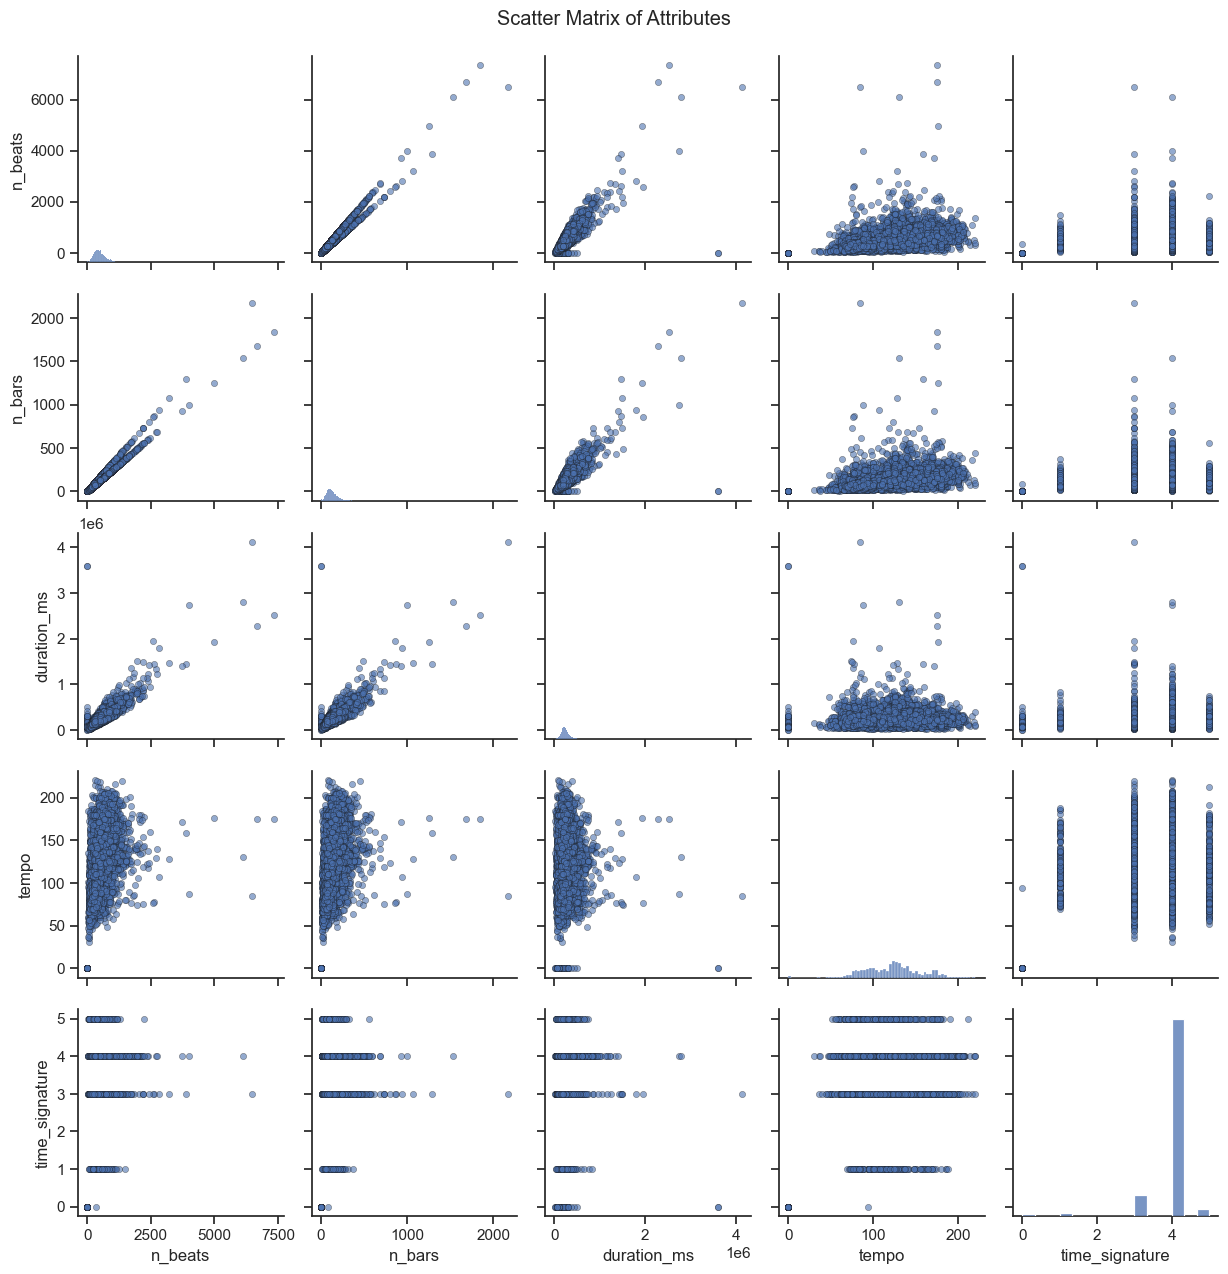

In [56]:
sns.set(style="ticks")
sns.pairplot(df[['n_beats', 'n_bars', 'duration_ms', 'tempo', 'time_signature']], 
             plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'k'})
plt.suptitle("Scatter Matrix of Attributes", y=1.02)
plt.show()

---------------------------------------------------------------------------------------------------------------
## are similar but ...
- popularity_confidence: 	The confidence, from 0.0 to 1.0, of the popularity of the song.
- popularity: 			The popularity of a track is a value between 0 and 100, with 100 being the most popular.

In [85]:
df[["popularity","popularity_confidence"]].corr() # non vedo nulla di che ma vorrei capire meglio ...

,popularity,popularity_confidence
popularity,1.000000,-0.003665
popularity_confidence,-0.003665,1.000000
